In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


In [2]:
import pandas as pd
import glob
import os

folder_path = "/Users/saber/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/项目/IT5006/dataSet"
file_list = [
    os.path.join(folder_path, f"train_{year}.csv")
    for year in range(2014, 2025)
]

df_train = pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)

print(df_train.shape)


(2795400, 22)


## Exploration and Visualization for Chicago Data

In [3]:
df_train.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,9911557,HY100008,12/31/2014 11:58:00 PM,061XX N HAMILTON AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,40.0,2.0,08B,1160876.0,1940913.0,2014,02/10/2018 03:50:01 PM,41.993559,-87.683593,"(41.99355926, -87.683592691)"
1,9911147,HY100062,12/31/2014 11:50:00 PM,012XX W 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,...,21.0,71.0,15,1169181.0,1852390.0,2014,02/04/2016 06:33:39 AM,41.750468,-87.655615,"(41.750468387, -87.65561467)"
2,9911062,HY100004,12/31/2014 11:50:00 PM,006XX E 38TH PL,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,4.0,36.0,26,1181017.0,1879593.0,2014,02/04/2016 06:33:39 AM,41.824852,-87.611405,"(41.824851907, -87.61140535)"
3,9911122,HY100036,12/31/2014 11:50:00 PM,006XX N HAMLIN AVE,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,RESIDENCE PORCH/HALLWAY,True,False,...,27.0,23.0,15,1150943.0,1903978.0,2014,02/04/2016 06:33:39 AM,41.892408,-87.721101,"(41.892407716, -87.721100762)"
4,9924830,HY113629,12/31/2014 11:46:00 PM,118XX S MARSHFIELD AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,DEPARTMENT STORE,False,False,...,34.0,75.0,11,1167507.0,1826158.0,2014,02/10/2018 03:50:01 PM,41.678520,-87.662498,"(41.678519693, -87.662497935)"


In [4]:
df_train.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795400 entries, 0 to 2795399
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [6]:
df_train.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.795400e+06,2.795400e+06,2.795399e+06,2.795343e+06,2.795200e+06,2.751036e+06,2.751036e+06,2.795400e+06,2.751036e+06,2.751036e+06
mean,1.161263e+07,1.147596e+03,1.124696e+01,2.313492e+01,3.681141e+01,1.164920e+06,1.886376e+06,2.018872e+03,4.184381e+01,-8.767031e+01
std,1.341902e+06,6.986308e+02,6.980351e+00,1.394900e+01,2.148279e+01,1.644651e+04,3.164151e+04,3.207719e+00,8.702452e-02,5.982091e-02
min,2.121200e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,3.661945e+01,-9.168657e+01
25%,1.063018e+07,6.110000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153240e+06,1.859074e+06,2.016000e+03,4.176871e+01,-8.771268e+01
50%,1.163306e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166713e+06,1.892953e+06,2.019000e+03,4.186201e+01,-8.766388e+01
75%,1.268974e+07,1.722000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176576e+06,1.909160e+06,2.022000e+03,4.190656e+01,-8.762769e+01
max,1.410651e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.024000e+03,4.202267e+01,-8.752453e+01


In [7]:
# Check for missing values in the dataset.
display(df_train.isnull().sum())

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description    13009
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       57
Community Area            200
FBI Code                    0
X Coordinate            44364
Y Coordinate            44364
Year                        0
Updated On                  0
Latitude                44364
Longitude               44364
Location                44364
dtype: int64

In [8]:
df_train['Primary Type'].unique()

array(['BATTERY', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'THEFT', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'CRIMINAL DAMAGE',
       'OTHER OFFENSE', 'BURGLARY', 'CRIM SEXUAL ASSAULT', 'ROBBERY',
       'ASSAULT', 'SEX OFFENSE', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'INTERFERENCE WITH PUBLIC OFFICER',
       'KIDNAPPING', 'HOMICIDE', 'INTIMIDATION', 'ARSON',
       'HUMAN TRAFFICKING', 'PROSTITUTION', 'OBSCENITY', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'STALKING', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'RITUALISM'], dtype=object)

In [9]:
df_train['Primary Type'].value_counts()

Primary Type
THEFT                                627835
BATTERY                              510642
CRIMINAL DAMAGE                      306921
ASSAULT                              218561
DECEPTIVE PRACTICE                   198409
OTHER OFFENSE                        177292
MOTOR VEHICLE THEFT                  154614
NARCOTICS                            135858
BURGLARY                             115363
ROBBERY                              105859
WEAPONS VIOLATION                     69048
CRIMINAL TRESPASS                     62265
OFFENSE INVOLVING CHILDREN            24388
PUBLIC PEACE VIOLATION                15750
SEX OFFENSE                           12834
INTERFERENCE WITH PUBLIC OFFICER      10220
CRIMINAL SEXUAL ASSAULT                9415
CRIM SEXUAL ASSAULT                    7895
HOMICIDE                               7085
PROSTITUTION                           7052
ARSON                                  5093
STALKING                               3177
LIQUOR LAW VIOLATIO

In [10]:
print(len(df_train['Primary Type'].unique()))

33


During these 10 years, there are 33 types of crime in Chicago. 

Among them, the type with the highest crime rate is theft, the second is battery.

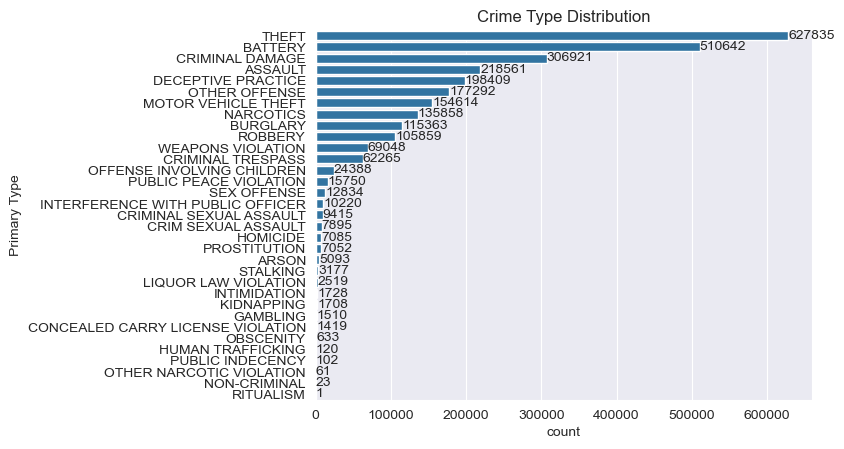

In [11]:
# Create the countplot
ax = sns.countplot(y=df_train['Primary Type'], order=df_train["Primary Type"].value_counts().index)
plt.title("Crime Type Distribution")

# Add value counts to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 2, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')

plt.show()

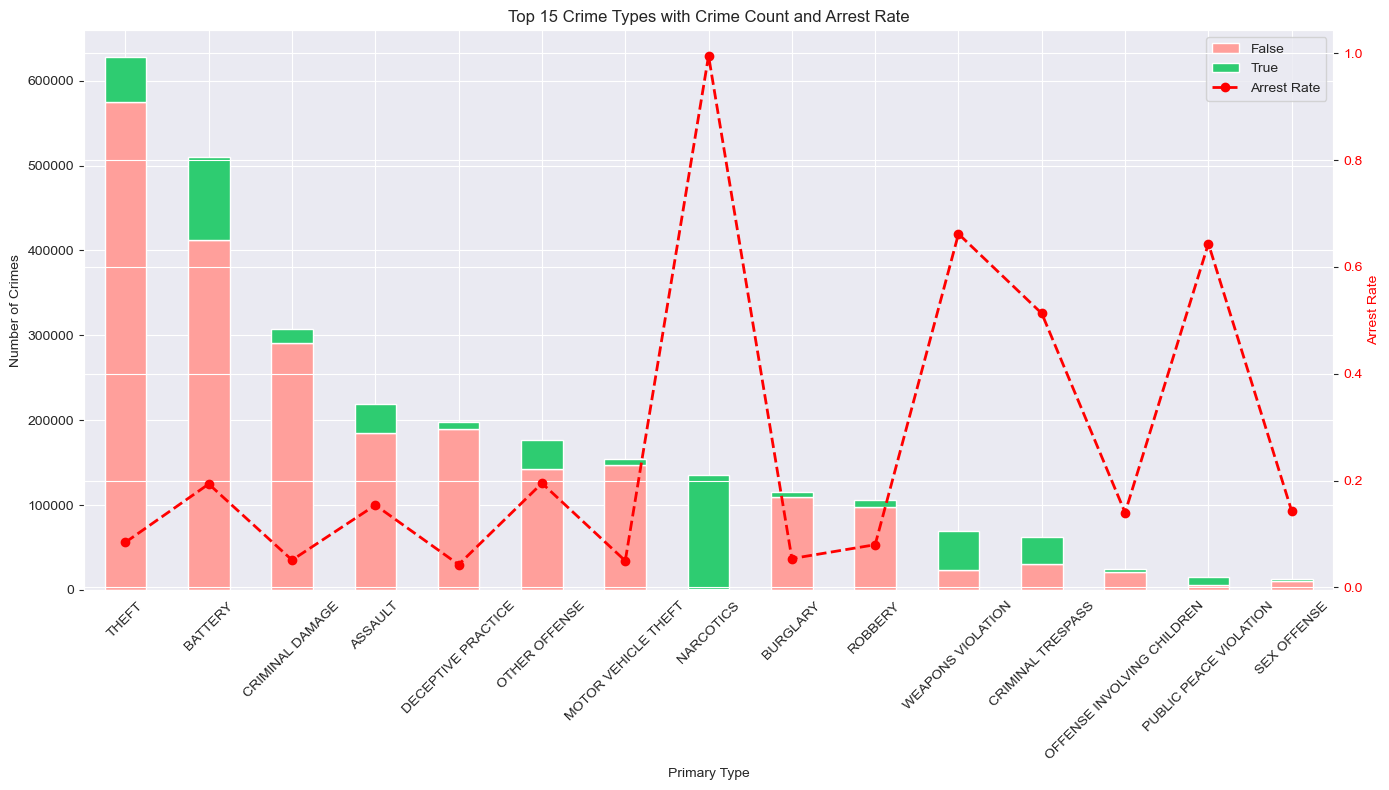

In [12]:
top_n = 15
top_types = df_train['Primary Type'].value_counts().nlargest(top_n).index
df_top = df_train[df_train['Primary Type'].isin(top_types)]

# summarize arrest rate
stacked_counts = df_top.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)
arrest_rate = stacked_counts[True] / (stacked_counts[True] + stacked_counts[False])


fig, ax1 = plt.subplots(figsize=(14, 8))

stacked_counts.loc[top_types].plot(kind='bar', stacked=True, ax=ax1, color = ['#ff9f9b', '#2ecc71'])
ax1.set_ylabel("Number of Crimes")
ax1.set_xlabel("Primary Type")
ax1.set_title("Top 15 Crime Types with Crime Count and Arrest Rate")
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.plot(
    top_types,
    arrest_rate.loc[top_types],
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Arrest Rate'
)
ax2.set_ylabel("Arrest Rate", color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


### Temporal Pattern Analysis

**Yearly Trend: A Rising Crime Rate**

Our analysis reveals a consistent year-over-year increase in crime incidents from 2021 to 2024. This upward trajectory suggests a worsening crime situation that demands urgent attention from authorities.

/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/3359810468.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Date'] = pd.to_datetime(df_train['Date'])


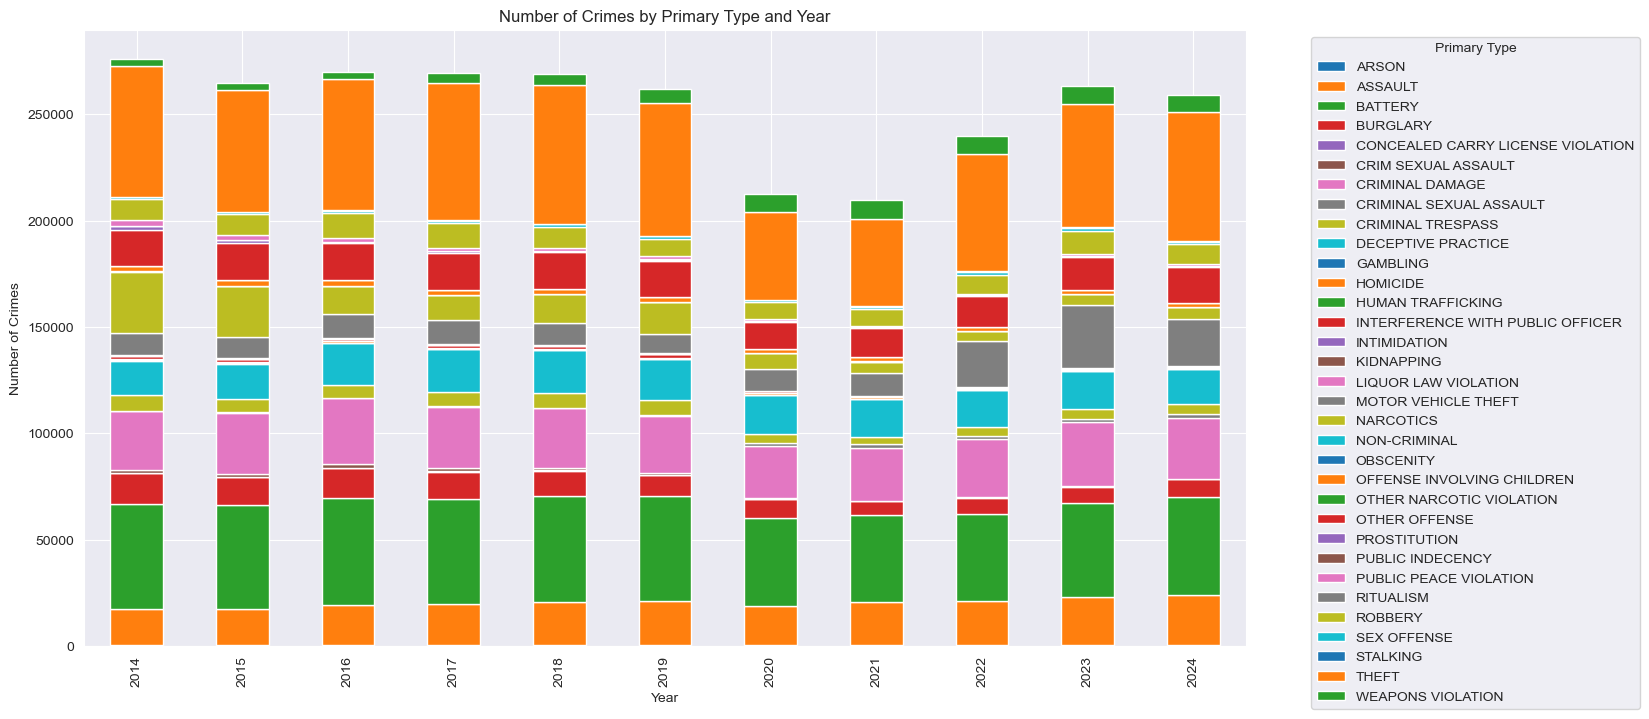

In [13]:
# Convert the 'date' column to datetime objects
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Extract the year from the 'date' column
df_train['year'] = df_train['Date'].dt.year

# Group the data by year and primary_type, and count the number of occurrences
crime_counts_by_year = df_train.groupby(['year', 'Primary Type'])['Primary Type'].count().unstack()

# Plot the stacked bar chart
ax = crime_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type and Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Monthly Trend: Seasonal Fluctuations**

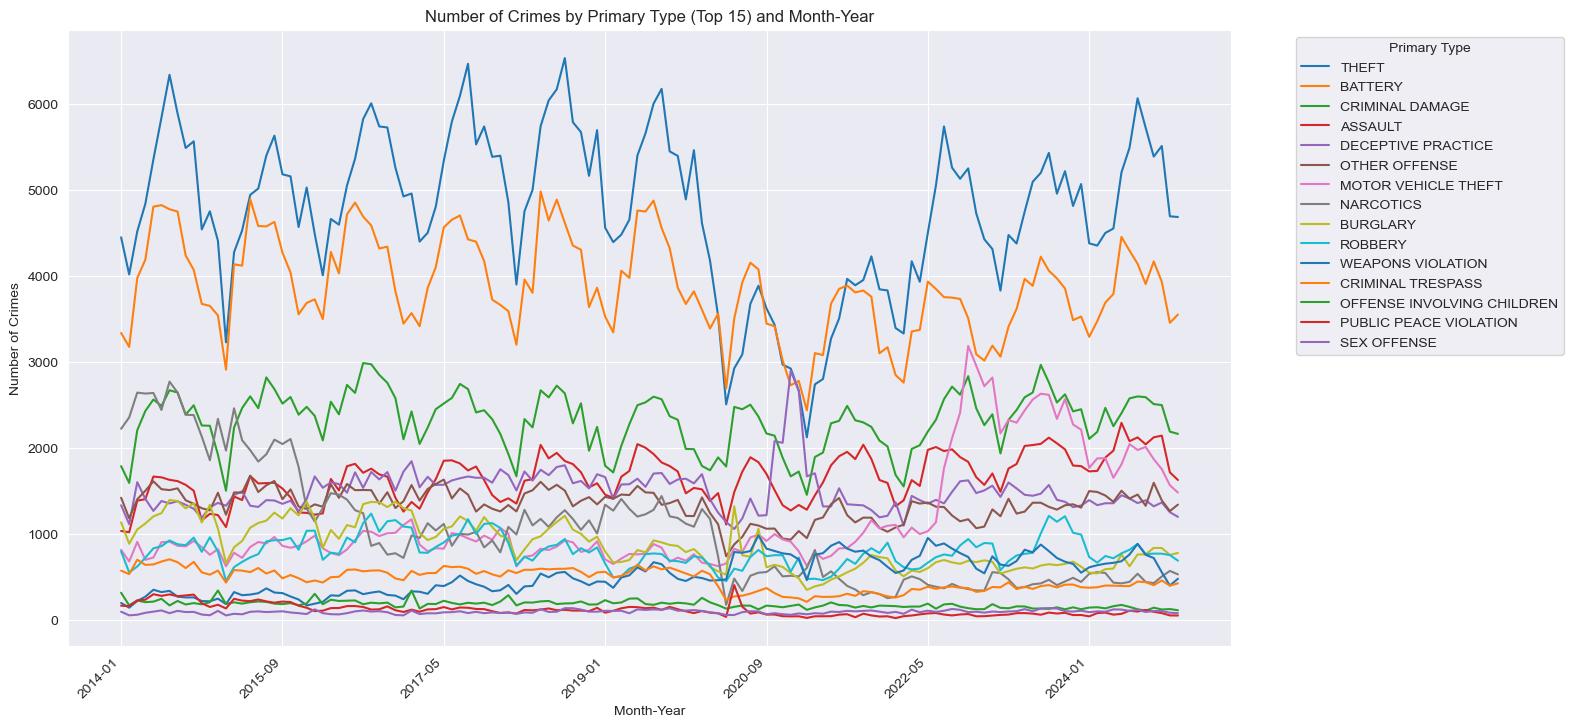

In [14]:

df_train['month_year'] = df_train['Date'].dt.strftime('%Y-%m')

# Group by month_year and primary_type, then count occurrences
crime_counts_by_month_year = df_train.groupby(['month_year', 'Primary Type'])['Primary Type'].count().unstack()

# Get top 15 primary types
top_15_primary_types = df_train['Primary Type'].value_counts().nlargest(15).index

# Filter the crime counts to include only the top 15 primary types
crime_counts_by_month_year = crime_counts_by_month_year[top_15_primary_types]

# Plot the line graph
ax = crime_counts_by_month_year.plot(kind='line', figsize=(15, 8))
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type (Top 15) and Month-Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


- **Summer Peak**: Crime rates consistently peak during summer months (June-August), with July showing the highest average incidents.

- **Winter Decline**: A notable decrease occurs during winter months (December-February), with February showing the lowest average incidents.

- **Holiday Season Spike**: Despite the winter decline, December shows a localized increase compared to November and January, likely due to holiday-related theft and fraud.

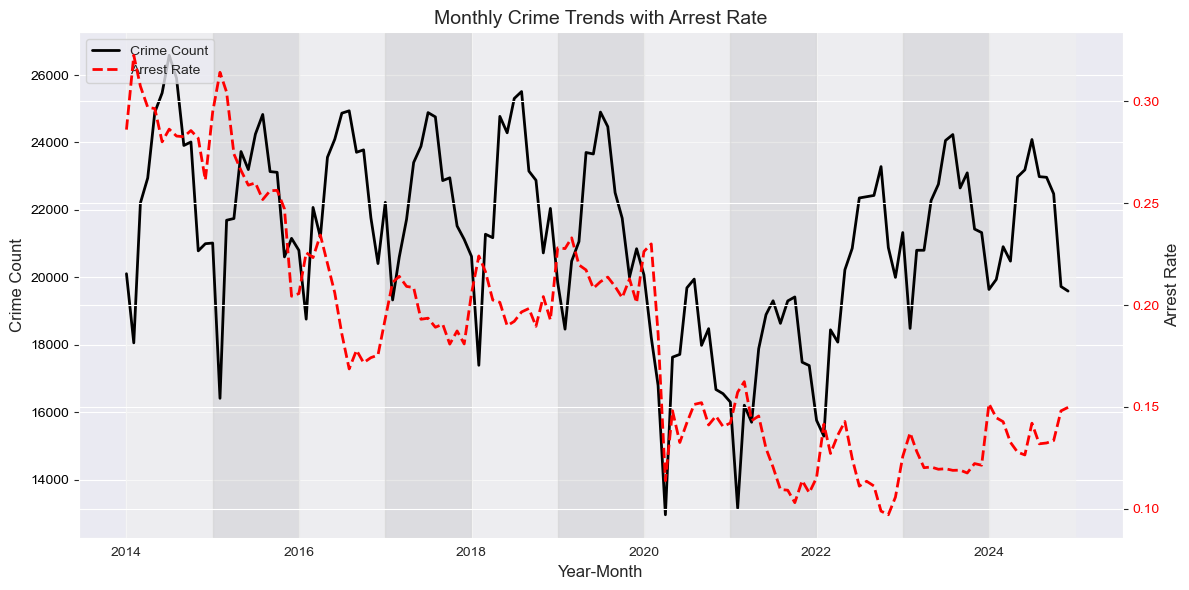

In [15]:
# Convert date column to datetime
data = df_train
data["date"] = pd.to_datetime(data["Date"])

# Aggregate crime counts per month
data["YearMonth"] = data["date"].dt.to_period("M")
data["Year"] = data["date"].dt.year
crime_trends = data.groupby("YearMonth")["Primary Type"].count()

# Aggregate arrest counts per month and year
monthly_stats = data.groupby("YearMonth").agg(
    total_crimes=("Primary Type", "count"),
    arrested_count=("Arrest", lambda x: (x == True).sum())
)

# calculate arrest rate
monthly_stats["arrest_rate"] = monthly_stats["arrested_count"] / monthly_stats["total_crimes"]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(crime_trends.index.to_timestamp(), crime_trends.values, color="black", linewidth=2, label="Crime Count")
ax1.set_ylabel("Crime Count", fontsize=12)
ax1.tick_params(axis="y", labelcolor="black")


years = sorted(data["Year"].unique())
for i, year in enumerate(years):
    start = pd.to_datetime(f"{year}-01-01")
    end = pd.to_datetime(f"{year}-12-31")
    color = "#f0f0f0" if i % 2 == 0 else "#d0d0d0"  # Alternating shades
    ax1.axvspan(start, end, color=color, alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(
    monthly_stats.index.to_timestamp(),
    monthly_stats["arrest_rate"],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Arrest Rate"
)
ax2.set_ylabel("Arrest Rate", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

ax1.set_title("Monthly Crime Trends with Arrest Rate", fontsize=14)
ax1.set_xlabel("Year-Month", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

**Weekly Trend**


/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/3955391919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")


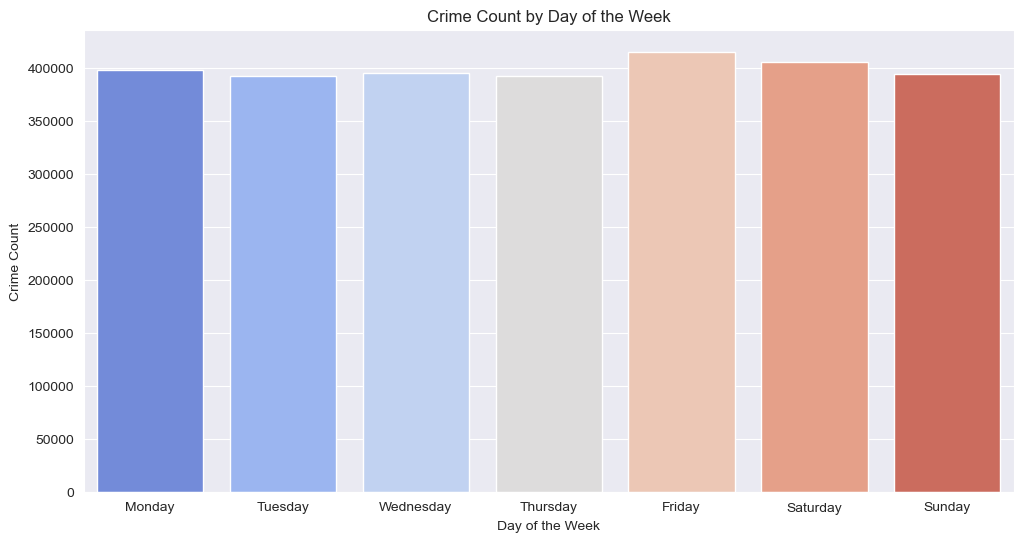

In [16]:
# Weekly Trend Of Crime
df_train['day_of_week'] = df_train['date'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(x=df_train['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")
plt.title("Crime Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.show()

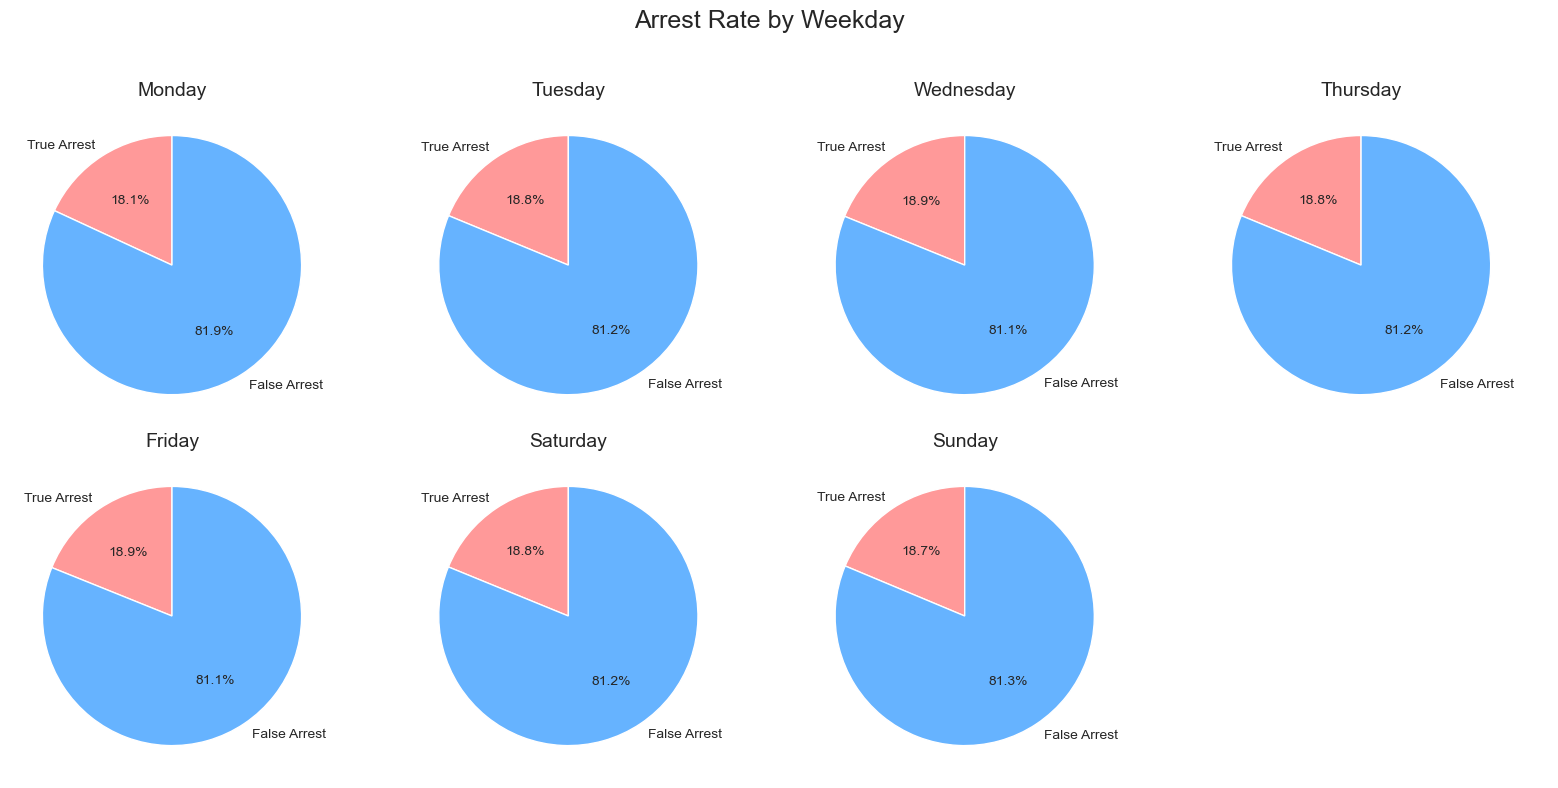

In [17]:

df_train['weekday'] = df_train['date'].dt.weekday

weekday_arrest_counts = df_train.groupby(['weekday', 'Arrest']).size().unstack(fill_value=0)
weekday_arrest_counts = weekday_arrest_counts.reindex(columns=[True, False], fill_value=0)

labels = ['True Arrest', 'False Arrest']
colors = ['#ff9999', '#66b3ff']

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(7):
    data = weekday_arrest_counts.loc[i]
    axes[i].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'{weekday_names[i]}', fontsize=14)

axes[7].axis('off')

plt.suptitle('Arrest Rate by Weekday', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Will Holiday affect arrest rate?**

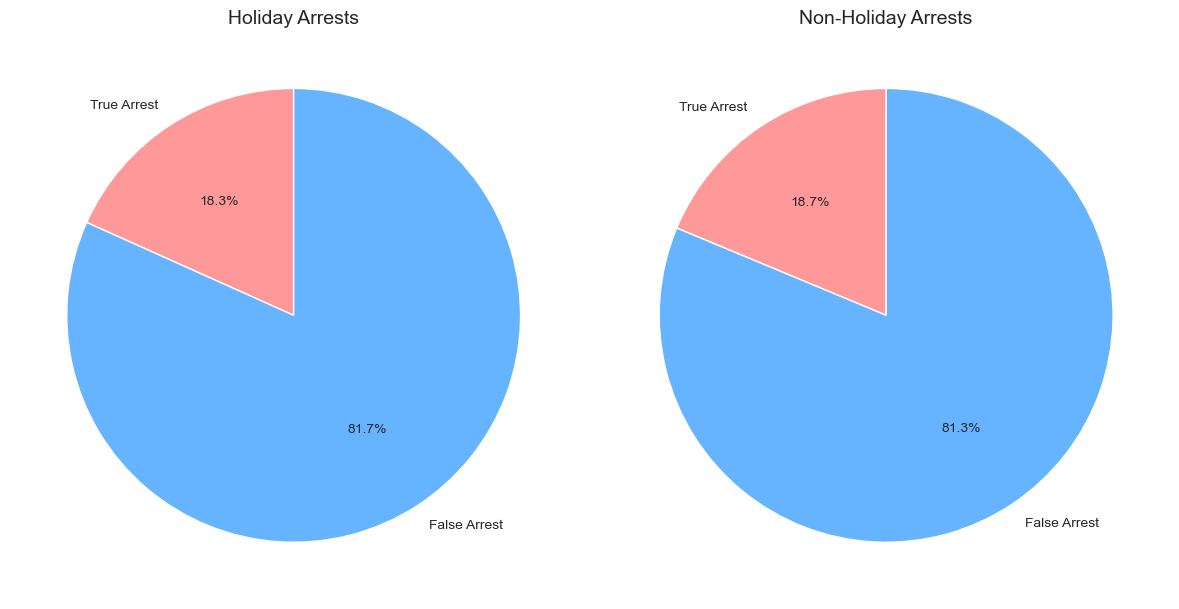

In [18]:
import holidays

us_holidays = holidays.US()
df_train['is_holiday'] = df_train['date'].dt.date.apply(lambda x: 1 if x in us_holidays else 0)

holiday_arrest_counts = (
    df_train.groupby(['is_holiday', 'Arrest']).size().unstack(fill_value=0)
).reindex(columns=[True, False], fill_value=0)

holiday_data = holiday_arrest_counts.loc[1]
non_holiday_data = holiday_arrest_counts.loc[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels = ['True Arrest', 'False Arrest']
colors = ['#ff9999', '#66b3ff']

axes[0].pie(
    holiday_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 10}
)
axes[0].set_title('Holiday Arrests', fontsize=14)

axes[1].pie(
    non_holiday_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 10}
)
axes[1].set_title('Non-Holiday Arrests', fontsize=14)

plt.tight_layout()
plt.show()

**Daily Trend**

Crime incidents throughout the day follow a bi-modal distribution with:
- **Evening Peak** (3:00-8:00 PM): Highest concentration during afternoon/evening commute and early evening.
- **Midnight** (11:00 PM-1:00 AM) : Socializing at night can lead to high crime rates.

/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/2701068751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['hour'], palette="coolwarm")


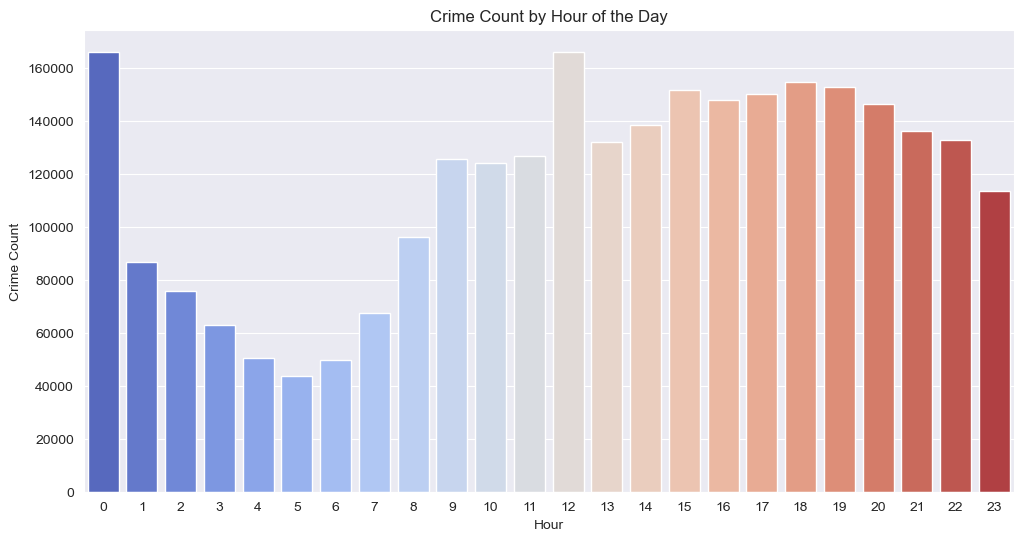

In [19]:
# Hourly Trend in 1 Day of Crime
df_train['hour'] = df_train['date'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x=df_train['hour'], palette="coolwarm")
plt.title("Crime Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()


/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/2399944426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=arrest_rate, x='hour', y='arrest_rate', palette='coolwarm')


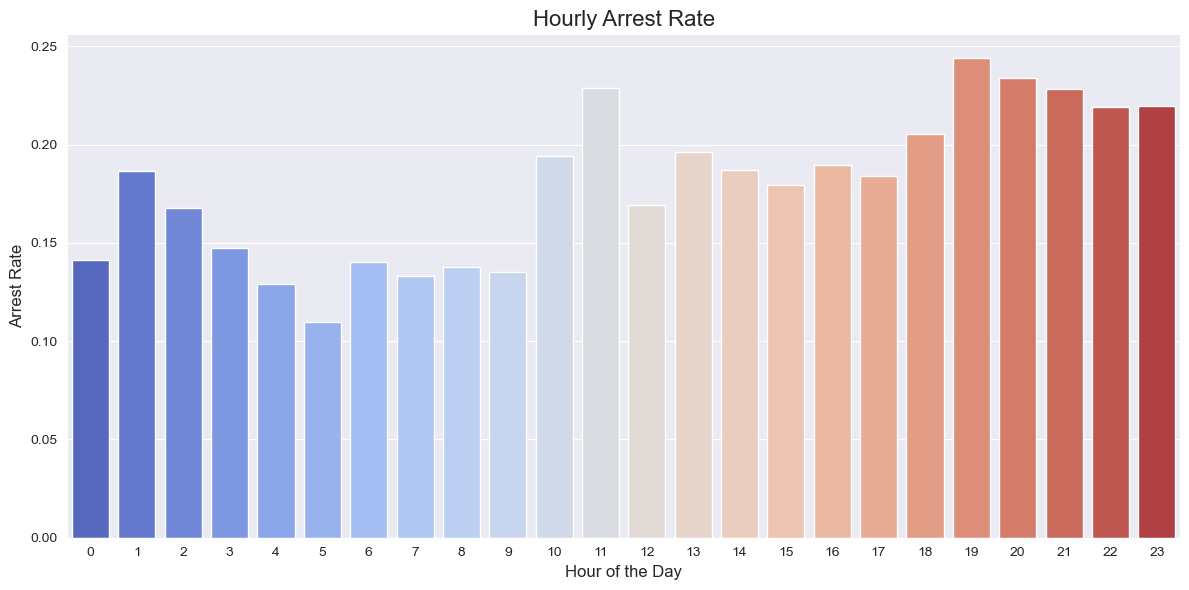

In [20]:
# calculate predict rate per hour
df_train['hour'] = df_train['date'].dt.hour
arrest_rate = df_train.groupby('hour')['Arrest'].mean().reset_index()
arrest_rate.columns = ['hour', 'arrest_rate']

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=arrest_rate, x='hour', y='arrest_rate', palette='coolwarm')


plt.title('Hourly Arrest Rate', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Arrest Rate', fontsize=12)

plt.xticks(ticks=range(len(arrest_rate['hour'])), labels=arrest_rate['hour'], rotation=0)

plt.tight_layout()
plt.show()

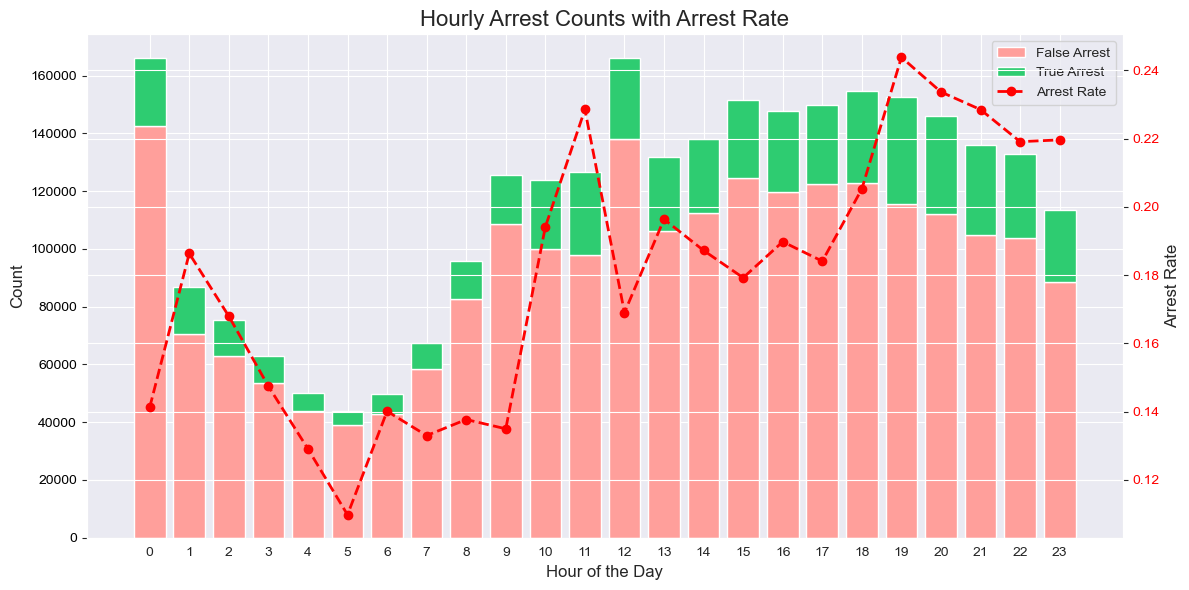

In [21]:
df_train['hour'] = df_train['date'].dt.hour

arrest_counts = df_train.groupby(['hour', 'Arrest']).size().unstack(fill_value=0)
arrest_counts = arrest_counts.reindex(columns=[True, False], fill_value=0)

# calcaulate arrest rate per hour
arrest_rate = df_train.groupby('hour')['Arrest'].mean().reset_index()
arrest_rate.columns = ['hour', 'arrest_rate']

fig, ax1 = plt.subplots(figsize=(12, 6))

hours = arrest_counts.index
true_counts = arrest_counts[True]
false_counts = arrest_counts[False]

bar2 = ax1.bar(hours, false_counts, label='False Arrest', color='#ff9f9b')
bar1 = ax1.bar(hours, true_counts, bottom=false_counts, label='True Arrest', color='#2ecc71')
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis="y", labelcolor="black")

ax1.set_title("Hourly Arrest Counts with Arrest Rate", fontsize=16)
ax1.set_xlabel("Hour of the Day", fontsize=12)

plt.xticks(ticks=range(len(hours)), labels=hours, rotation=0)

ax2 = ax1.twinx()
line, = ax2.plot(
    arrest_rate['hour'],
    arrest_rate['arrest_rate'],
    color="red",
    marker='o',
    linestyle="--",
    linewidth=2,
    label="Arrest Rate"
)
ax2.set_ylabel("Arrest Rate", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

lines, labels = ax1.get_legend_handles_labels()
lines += [line]
labels += ["Arrest Rate"]
ax1.legend(lines, labels, loc="upper right")

plt.tight_layout()
plt.show()

### Spatial Distribution Analysis

The spatial analysis reveals that crime locations are not randomly distributed but show clear patterns. The high prevalence of street crimes points to the need for increased patrol efforts and public space surveillance. Similarly, the significant number of apartment-based crimes suggests a need for improved residential security measures and community-based crime prevention programs.

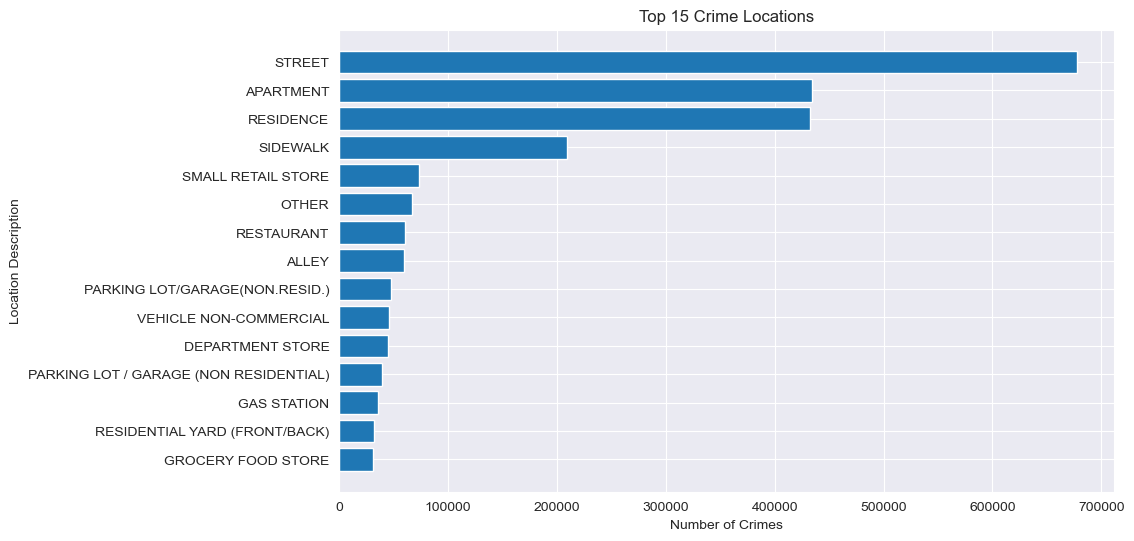

In [22]:
# Group the data by location_description and count occurrences
location_counts = df_train['Location Description'].value_counts()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_counts.nlargest(top_n)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_locations.index, top_locations.values)
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.title('Top {} Crime Locations'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent location at the top
plt.show()


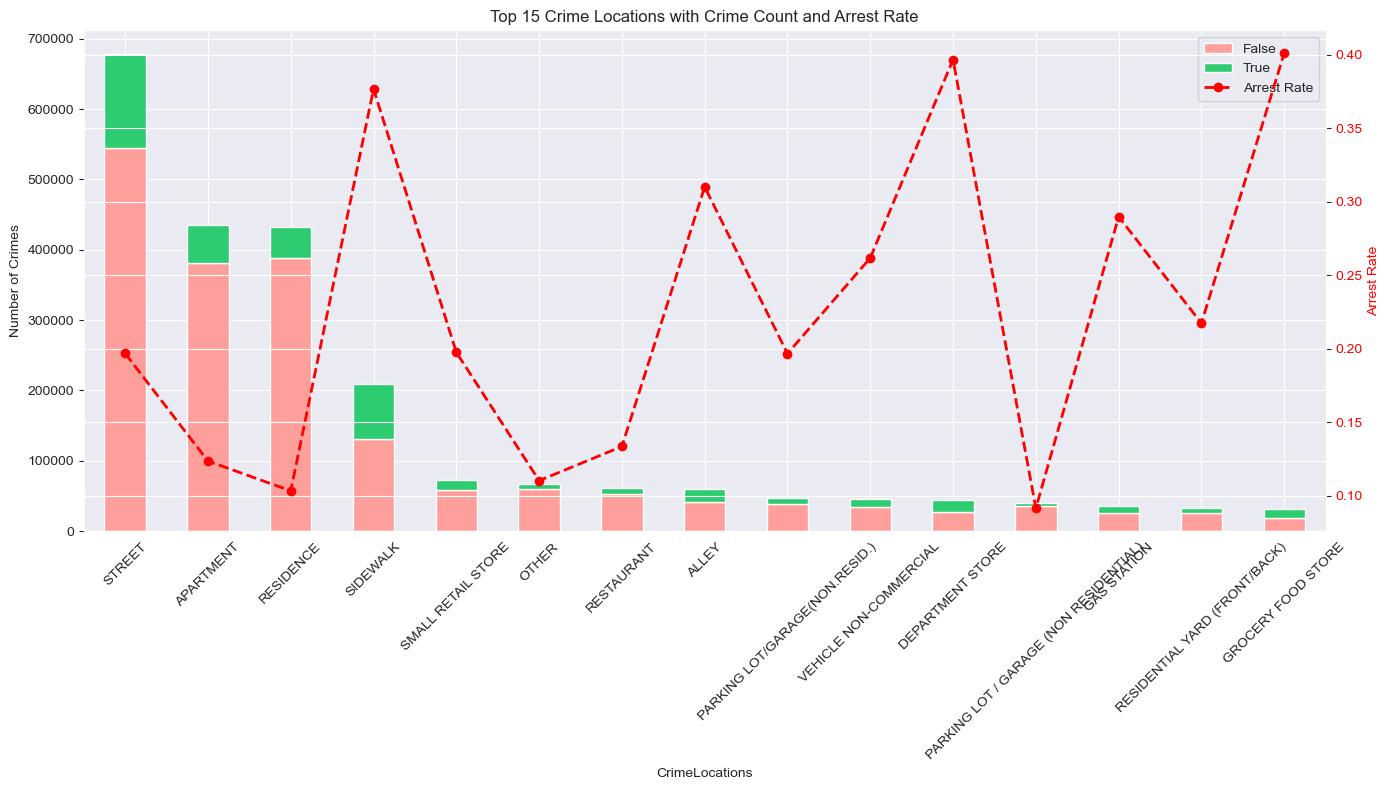

In [23]:
top_n = 15
top_types = df_train['Location Description'].value_counts().nlargest(top_n).index
df_top = df_train[df_train['Location Description'].isin(top_types)]

# summarize arrest rate
stacked_counts = df_top.groupby(['Location Description', 'Arrest']).size().unstack(fill_value=0)
arrest_rate = stacked_counts[True] / (stacked_counts[True] + stacked_counts[False])


fig, ax1 = plt.subplots(figsize=(14, 8))

stacked_counts.loc[top_types].plot(kind='bar', stacked=True, ax=ax1, color = ['#ff9f9b', '#2ecc71'])
ax1.set_ylabel("Number of Crimes")
ax1.set_xlabel("CrimeLocations")
ax1.set_title("Top 15 Crime Locations with Crime Count and Arrest Rate")
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.plot(
    top_types,
    arrest_rate.loc[top_types],
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Arrest Rate'
)
ax2.set_ylabel("Arrest Rate", color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


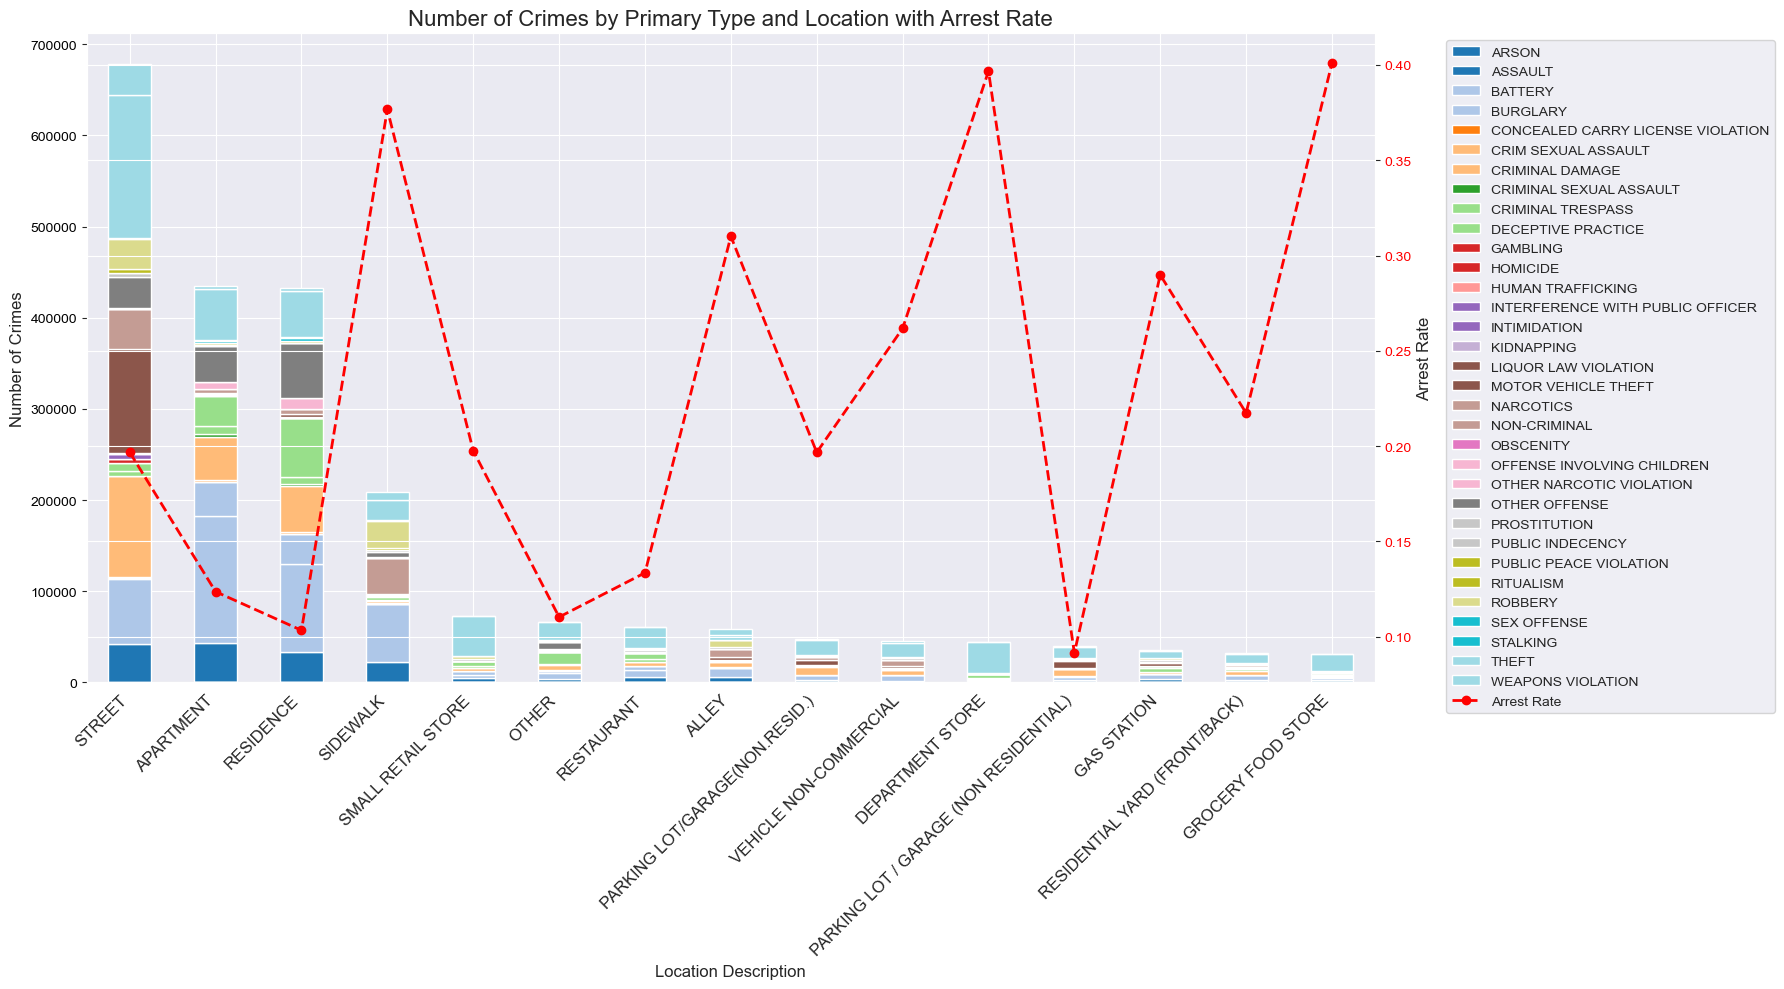

In [24]:
# Group the data by location_description and primary_type, then count occurrences
location_primary_type_counts = df_train.groupby(['Location Description', 'Primary Type'])['Primary Type'].count().unstack()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_primary_type_counts.sum(axis=1).nlargest(top_n).index

# Filter the data to include only the top locations
location_primary_type_counts = location_primary_type_counts.loc[top_locations]

# Step 2: Calculate arrest rate for each location
arrest_stats = df_train.groupby('Location Description').agg(
    total_count=('Arrest', 'size'),
    arrested_count=('Arrest', lambda x: (x == True).sum())
)
arrest_stats['arrest_rate'] = arrest_stats['arrested_count'] / arrest_stats['total_count']

# Filter arrest stats to include only the top locations
arrest_stats = arrest_stats.loc[top_locations]

# Step 3: Plot the stacked bar chart with a line plot for arrest rate
fig, ax1 = plt.subplots(figsize=(18, 10))

location_primary_type_counts.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
ax1.set_xlabel('Location Description', fontsize=12)
ax1.set_ylabel('Number of Crimes', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize=8, ncol=2)

ax2 = ax1.twinx()
ax2.plot(
    arrest_stats.index,
    arrest_stats['arrest_rate'],
    color='red',
    linestyle='--',
    linewidth=2,
    marker='o',
    label='Arrest Rate'
)
ax2.set_ylabel('Arrest Rate', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Number of Crimes by Primary Type and Location with Arrest Rate', fontsize=16)

lines, labels = ax1.get_legend_handles_labels()
lines += ax2.get_legend_handles_labels()[0]
labels += ['Arrest Rate']
ax1.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()

plt.show()

In [25]:
# get crime geo data
crime_geo = df_train[['Primary Type', 'Latitude', 'Longitude']].dropna()

# get homicides
homicides = crime_geo[(crime_geo['Primary Type']=='HOMICIDE')]
homicides['Latitude'] = pd.to_numeric(homicides['Latitude'], errors='coerce')
homicides['Longitude'] = pd.to_numeric(homicides['Longitude'], errors='coerce')
# print(homicides.head())

# get kidnappings
kidnappings = crime_geo[(crime_geo['Primary Type']=='KIDNAPPING')]
kidnappings['Latitude'] = pd.to_numeric(kidnappings['Latitude'], errors='coerce')
kidnappings['Longitude'] = pd.to_numeric(kidnappings['Longitude'], errors='coerce')
# print(kidnappings.head())

# get criminal sexual assaults
sexual_assaults = crime_geo[(crime_geo['Primary Type']=='CRIMINAL SEXUAL ASSAULT')]
sexual_assaults['Latitude'] = pd.to_numeric(sexual_assaults['Latitude'], errors='coerce')
sexual_assaults['Longitude'] = pd.to_numeric(sexual_assaults['Longitude'], errors='coerce')
# print(sexual_assaults.head())

# get thefts
thefts = crime_geo[(crime_geo['Primary Type']=='THEFT')]
thefts['Latitude'] = pd.to_numeric(thefts['Latitude'], errors='coerce')
thefts['Longitude'] = pd.to_numeric(thefts['Longitude'], errors='coerce')
# print(thefts.head())

/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/1054620518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['Latitude'] = pd.to_numeric(homicides['Latitude'], errors='coerce')
/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/1054620518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['Longitude'] = pd.to_numeric(homicides['Longitude'], errors='coerce')
/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/1054620518.py:12: SettingWithCopy

Widening the field of view, we can see the crime cases in the whole Chicago.

- Homicide is concentrated in the south and east, and less so in the west.
- Criminal sexual assault occurs mostly in the South and West.
- Theft occurs in all regions.

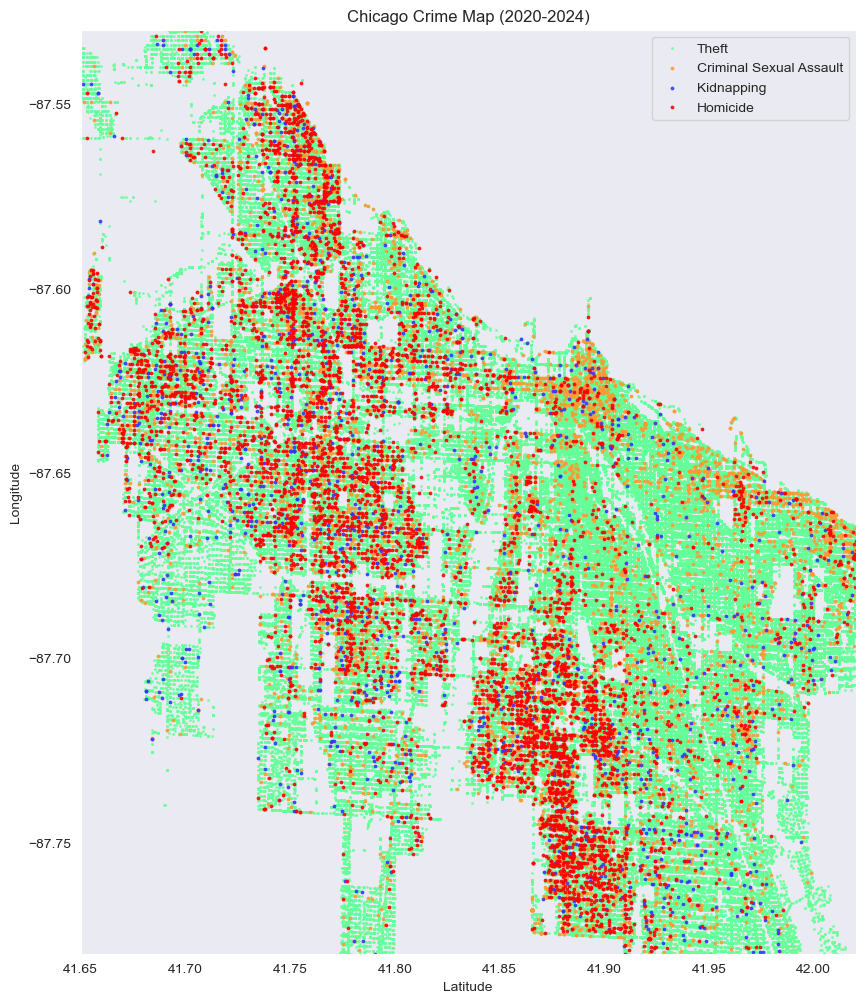

In [26]:
# create scatter map plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat)
plt.ylim(-87.78, -87.53) # (minLong, maxLong)
#ax.set_facecolor('black')

# plot thefts, homicides, kidnappings and sexual assaults
ax.scatter(thefts['Latitude'], thefts['Longitude'],\
                            s=1, alpha=0.8, color='#66ff99', label='Theft')
ax.scatter(sexual_assaults['Latitude'], sexual_assaults['Longitude'],\
                            s=3, alpha=0.8, color='#ff9933', label='Criminal Sexual Assault')
ax.scatter(kidnappings['Latitude'], kidnappings['Longitude'],\
                            s=3, alpha=0.8, color='#3333ff', label='Kidnapping')
ax.scatter(homicides['Latitude'], homicides['Longitude'],\
                            s=3, alpha=0.8, color='#ff0000', label='Homicide')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Chicago Crime Map (2020-2024)')
plt.legend(loc='upper right', frameon=True)
plt.grid(linestyle = '--', linewidth = 0.05)
plt.show()

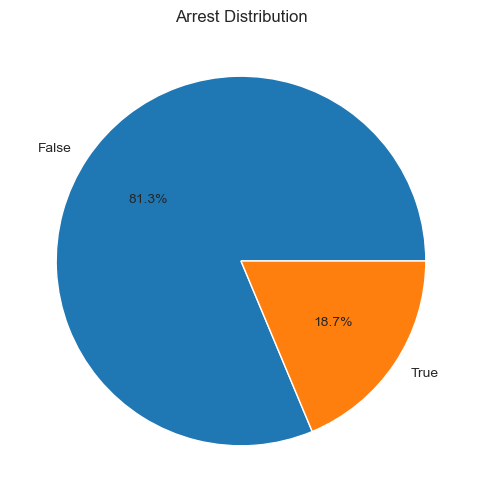

In [27]:
# Check for arrest percentage
arrest_counts = df_train['Arrest'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%')
plt.title("Arrest Distribution")
plt.show()

### Crime Correlation Analysis

**Geographic Correlations**

**Strong Positive Correlations:**
- Beat and district: Expected due to administrative nesting (Beats are fixed geographic areas)
- Y-coordinate and latitude: Perfect alignment in coordinate systems (Y Coordinates represent the North-South position of an incident)
- X-coordinate and longitude: Perfect alignment in coordinate systems (X Coordinates represent the East-West position of an incident)

**Strong Negative Correlations:**
- Community area and y-coordinate: Indicates a north-south trend in community area numbering
- Community area and latitude: Confirms the geographic pattern in community area organization

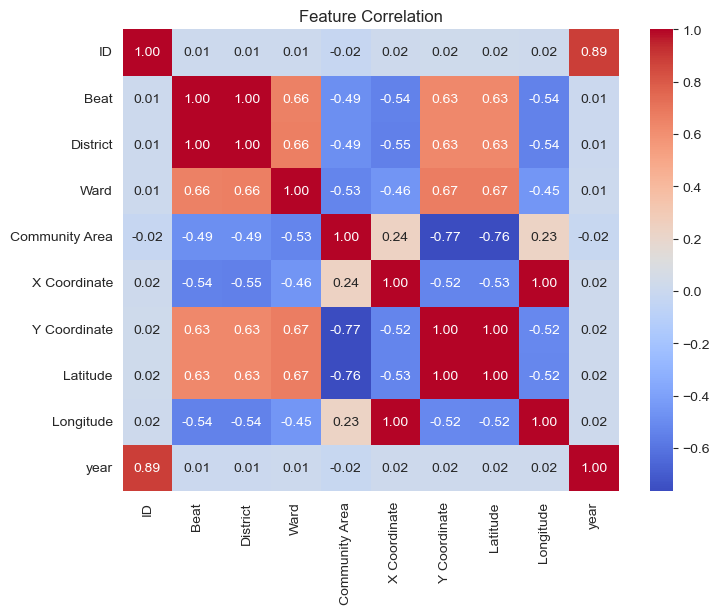

In [28]:
data = df_train.drop(columns=["Year","weekday", "hour"])
# Correlation heatmap
plt.figure(figsize=(8,6))
numerical_data = data.select_dtypes(include=['number'])
numerical_data.drop(columns=['is_holiday'], inplace=True)
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

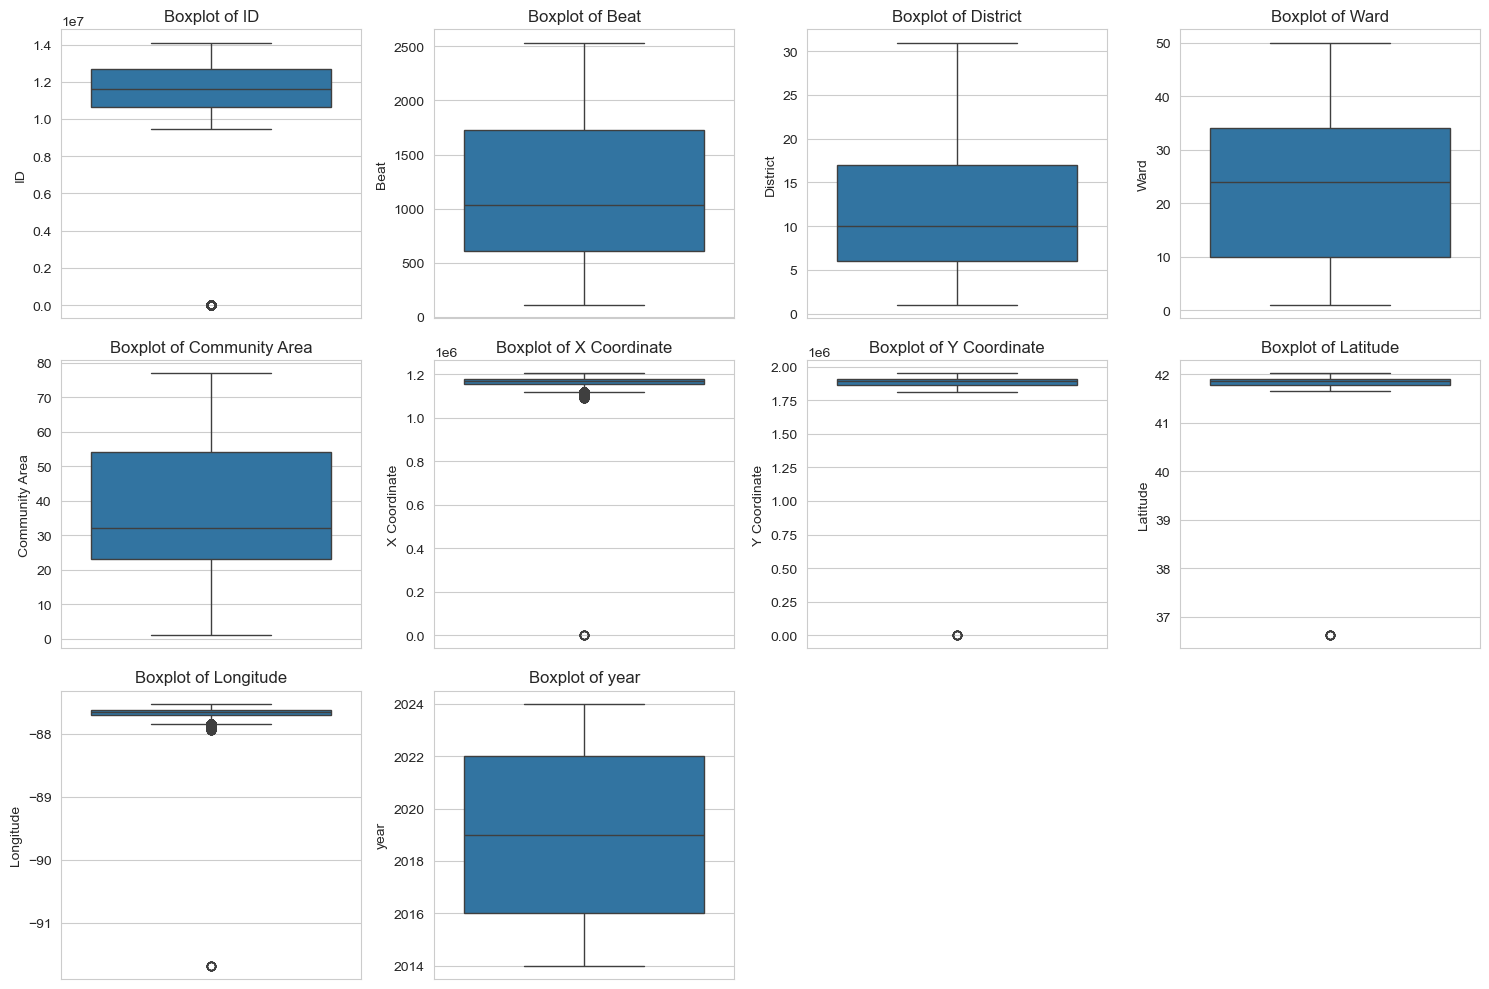

In [29]:
# Plot all numerical features as boxplots
plt.figure(figsize=(15, 10))

# Change the subplot layout to accommodate all columns
for i, col in enumerate(numerical_data):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=numerical_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Crime Type Correlations:**

**Positive Correlations:**
- Theft and motor vehicle theft: It means that there are common underlying factors or perpetrators
- Burglary and theft: It indicates property crime clustering

**Negative Correlations:**
- Criminal damage and narcotics: It implies that they occurred in different 

/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/1408955094.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_property_crime_counts = property_crimes.groupby([pd.Grouper(key='Date', freq='M'), 'Primary Type']).size().unstack(fill_value=0)


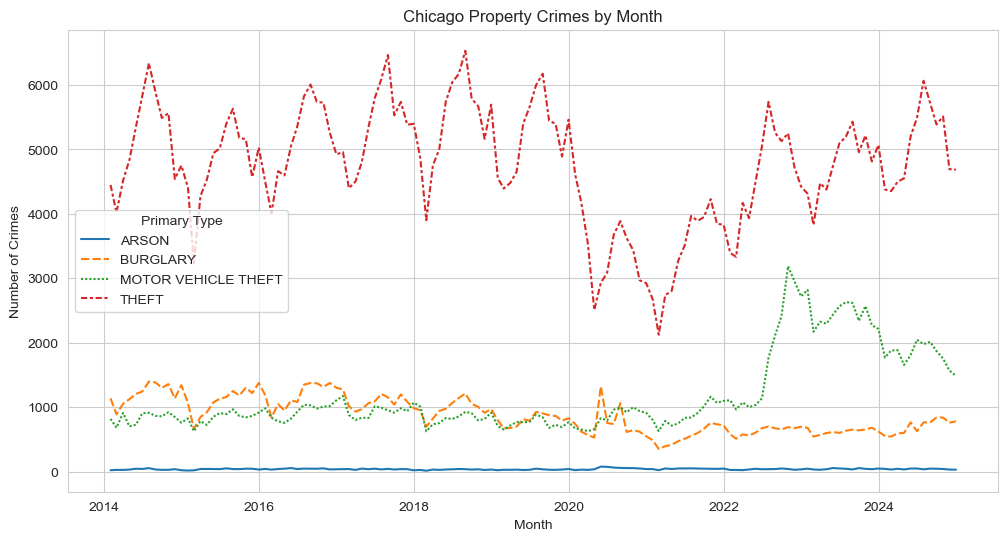

In [30]:
# Classify ARSON, BURGLARY, MOTOR VEHICLE THEFT, THEFT as 'property crimes'
property_crimes = df_train[df_train['Primary Type'].isin(['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT'])]

# calcaulte the number of property crimes for each month
monthly_property_crime_counts = property_crimes.groupby([pd.Grouper(key='Date', freq='M'), 'Primary Type']).size().unstack(fill_value=0)

# print(monthly_property_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_property_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Property Crimes by Month')
plt.legend(title='Primary Type')
plt.show()

/var/folders/04/rlmxzgf52fbdlnjh6pc69p3c0000gn/T/ipykernel_76899/2831293694.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_q_of_life_crime_counts = q_of_life_crimes.groupby([pd.Grouper(key='Date', freq='M'), 'Primary Type']).size().unstack(fill_value=0)


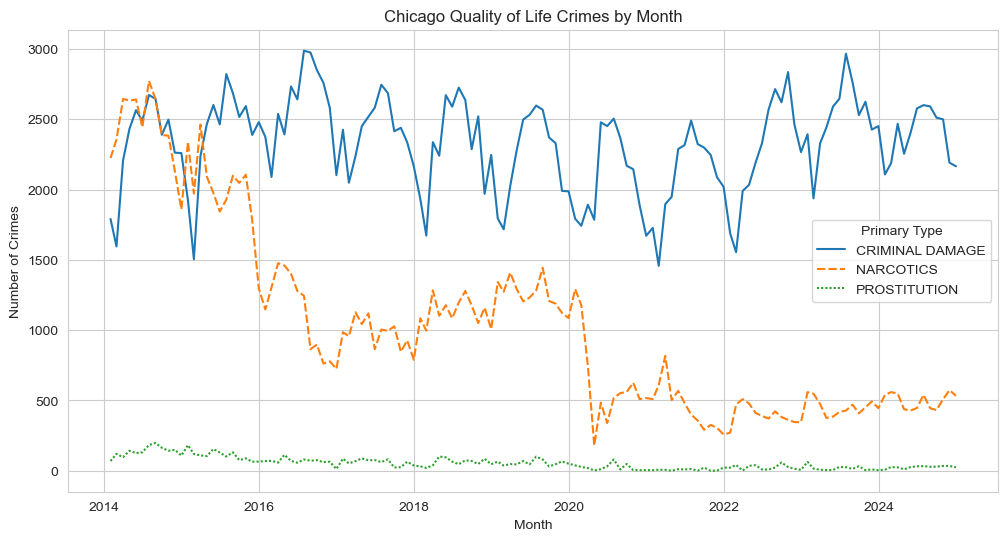

In [31]:
# Classify CRIMINAL DAMAGE, NARCOTICS, PROSTITUTION as 'quality of life crimes'
q_of_life_crimes = df_train[df_train['Primary Type'].isin(['CRIMINAL DAMAGE', 'NARCOTICS', 'PROSTITUTION'])]

# calcaulte the number of quality of life crimes for each month
monthly_q_of_life_crime_counts = q_of_life_crimes.groupby([pd.Grouper(key='Date', freq='M'), 'Primary Type']).size().unstack(fill_value=0)

# print(monthly_q_of_life_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_q_of_life_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Quality of Life Crimes by Month')
plt.legend(title='Primary Type')
plt.show()

In [32]:
df_train.to_csv('processed_chicago_crime_data.csv', index=False)
print("SuccessFul saved processed data!")

SuccessFul saved processed data!
